<a href="https://colab.research.google.com/github/Ambg0231/MachineLearningNotes/blob/main/TALLER_Metricas_de_Evaluacion_de_modelos_de_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/acubillosunal/UBM-MACHINE-LEARNING-1/blob/main/18-%5BTALLER%5D_Metricas_de_Evaluacion_de_modelos_de_ML.ipynb#scrollTo=KUyBpQLcOLWH" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras alamancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

Angela Burgos, Sandra Escobar

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosunal/UBM-MACHINE-LEARNING-1/main/init.py
import init; init.init(force_download=False);

replicating local resources


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install scikit-learn==0.22

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (scikit-learn)


## Ejercicio 1: Contextualización del problema


Usaremos el dataset breast_cancer para el problema de clasificación. En el repositorio de sklearn se encuentra más información en el siguiente [link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
Y = data.target

In [ ]:
print ("Número de muestras", X.shape[0])
print ("Número de variables", X.shape[1])
print ("Número de clases", len(np.unique(Y)))

Número de muestras 569
Número de variables 30
Número de clases 2


In [ ]:
columnas = data.target_names
print(columnas)

['malignant' 'benign']


Grafique un histograma de la variables de salida:

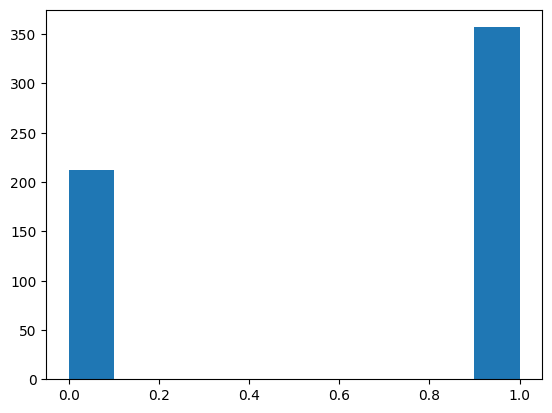

In [ ]:
#Ejercicio de código

plt.hist(Y)
plt.show()

## Ejercicio 2: Entrenamiento y evaluación de modelos

En este ejercicio se usarán los modelos de regresión logística, Naïve Bayes y Discriminante Cuadrático para resolver el problema de preddicón de cancer.

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

Vamos a usar una partición similar a las usados en talleres anteriores:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Recuerde estandarizar variables...

In [ ]:
#Ejercicio de código
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_n = scaler.transform(X_train)
X_test_n = scaler.transform(X_test)



Instancie un objeto de cada uno de los modelos a comparar, use los parámetros por defecto para cada modelo y entrene el modelo con el conjunto X_train_n, y_train.

In [ ]:
#Ejercicio de código

clf1 = LogisticRegression(max_iter = 1000)
clf2 = GaussianNB()
clf3 = QuadraticDiscriminantAnalysis()
clf1.fit(X_train_n, y_train)
clf2.fit(X_train_n, y_train)
clf3.fit(X_train_n, y_train)


QuadraticDiscriminantAnalysis()

A continuación cargaremos las métricas para evaluar los modelos:

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score

Ejecute la siguiente para ver los resultados de los modelos

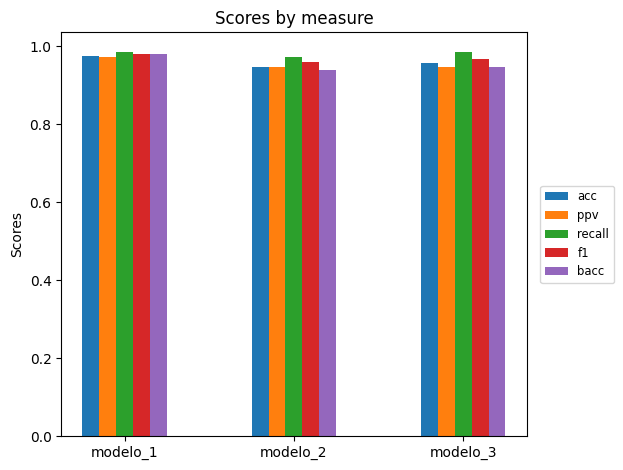

In [ ]:
labels = ['modelo_1', 'modelo_2', 'modelo_3']
measures = ['acc','ppv','recall','f1','bacc']
Performance = []
Performance.append([accuracy_score(y_test,clf1.predict(X_test_n)), accuracy_score(y_test,clf2.predict(X_test_n)), accuracy_score(y_test,clf3.predict(X_test_n))])
Performance.append([precision_score(y_test,clf1.predict(X_test_n)), precision_score(y_test,clf2.predict(X_test_n)), precision_score(y_test,clf3.predict(X_test_n))])
Performance.append([recall_score(y_test,clf1.predict(X_test_n)), recall_score(y_test,clf2.predict(X_test_n)), recall_score(y_test,clf3.predict(X_test_n))])
Performance.append([f1_score(y_test,clf1.predict(X_test_n)), f1_score(y_test,clf2.predict(X_test_n)), f1_score(y_test,clf3.predict(X_test_n))])
Performance.append([f1_score(y_test,clf1.predict(X_test_n)), balanced_accuracy_score(y_test,clf2.predict(X_test_n)), balanced_accuracy_score(y_test,clf3.predict(X_test_n))])

x = np.arange(len(labels))*2  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
for i in range(len(measures)):
    ax.bar(x + i*width+0.3 -0.7, Performance[i],width, label=measures[i])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=1,loc='center right', fontsize='small',bbox_to_anchor=(1.2, 0.5))
fig.tight_layout()
plt.show()

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿El desbalance observado en el conjunto de datos afectó el desempeño de los modelos?
respuesta_1 = "No. Las métricas evaluación muestran un desempeño muy bueno en los tres modelos" #@param {type:"string"}

In [ ]:
#@title Pregunta Abierta
#@markdown  Escoja una medida de desempeño global para evaluar el modelo. ¿Qué medida seleccionó? Justifique su respuesta.
respuesta_2 = "Optaría por el Balanced Accuracy Score (BACC), ya que ofrece una evaluación más equilibrada del rendimiento de un modelo de clasificación. Este indicador combina las medidas de sensibilidad y especificidad, mostrando hasta qué punto el modelo puede clasificar correctamente una observación" #@param {type:"string"}

Grafique la matriz de confusión normalizada para el mejor modelo de acuerdo con la medida de desempeño seleccionada  en la respuesta a la pregunta anterior. Revise la documentación del método en [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

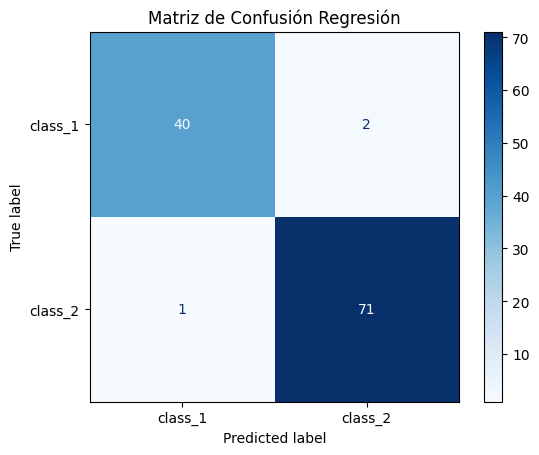

In [ ]:
#Ejercicio de código
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = clf1.predict(X_test_n)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['class_1','class_2'],)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión Regresión")
plt.show()

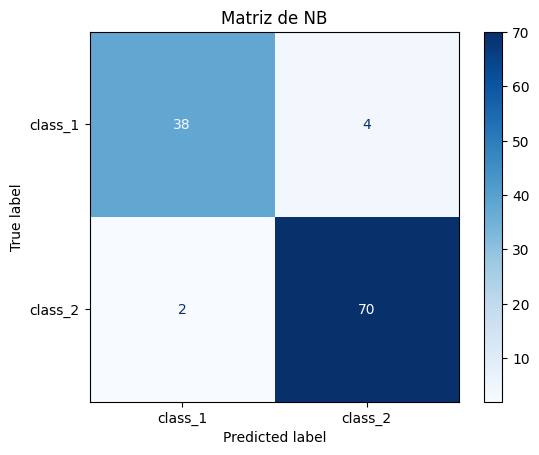

In [ ]:
y_pred = clf2.predict(X_test_n)
cm1 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['class_1','class_2'],)
disp.plot(cmap=plt.cm.Blues)

plt.title("Matriz de NB")
plt.show()



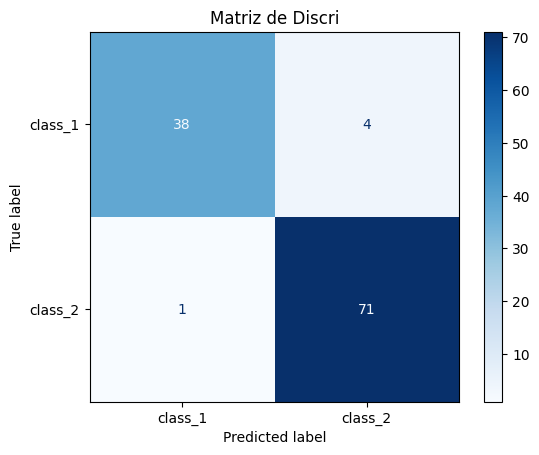

In [ ]:
y_pred = clf3.predict(X_test_n)
cm2 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['class_1','class_2'],)
disp.plot(cmap=plt.cm.Blues)

plt.title("Matriz de Discri")
plt.show()

Grafique en una misma figura las curvas ROC de los tres modelos e incluya en las etiquetas de la figura, el Area Bajo la curva obtenida para cada modelo. Revise la documentación del método en [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

In [ ]:
#Ejercicio de código
from sklearn.metrics import roc_curve, auc
fpr = np.zeros(len(labels))
tpr = np.zeros(len(labels))

#Complete el código
for i in range(len(labels)):
    fpr[i], tpr[i] = ...

In [ ]:
# Predecir las probabilidades
y_prob1 = clf1.predict_proba(X_test_n)[:, 1]
y_prob2 = clf2.predict_proba(X_test_n)[:, 1]
y_prob3 = clf3.predict_proba(X_test_n)[:, 1]



In [ ]:
# Calcular la curva ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds1 = roc_curve(y_test, y_prob1)
roc_auc1 = auc(fpr, tpr)

In [ ]:
# Calcular la curva ROC
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, _ = roc_curve(y_test, y_prob1)
fpr2, tpr2, _ = roc_curve(y_test, y_prob2)
fpr3, tpr3, _ = roc_curve(y_test, y_prob3)

roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)

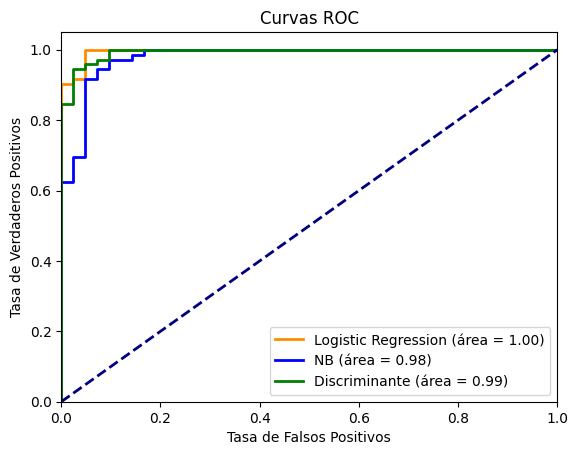

In [ ]:
#Graficar curvas Roc

# Dibujar las curvas ROC
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='Logistic Regression (área = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='NB (área = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='green', lw=2, label='Discriminante (área = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC')
plt.legend(loc="lower right")
plt.show()